In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [33]:
data = pd.read_csv('reviews.csv')

In [34]:
data.head()

,reviewId,userName,userImage,content,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
0,0197c118-5c6f-4a7b-894c-970023d1a350,Mar Zur,https://play-lh.googleusercontent.com/a/ACg8oc...,I have the same recurring tasks to do every da...,11,4.16.6.2,22-07-2020 13:13,Our team will be happy to look into it for you...,23-07-2020 16:32,4.16.6.2,most_relevant,com.anydo
1,94868fb5-a21d-4ef9-ab85-81b2ed3d0785,Devin Rivera,https://play-lh.googleusercontent.com/a-/ALV-U...,"Instead of shopping around, I downloaded Any.d...",8,NaN,08-12-2020 06:24,We are not aware of any issues with randomized...,10-12-2020 09:38,NaN,most_relevant,com.anydo
2,825da34e-f65d-4ef3-991d-02d5291820d6,Heidi Kinsley,https://play-lh.googleusercontent.com/a/ACg8oc...,Why does every once in a while... out of the b...,6,5.11.1.2,09-07-2021 13:51,Sorry to hear that! It sounds like you might h...,11-07-2021 11:16,5.11.1.2,most_relevant,com.anydo
3,a49c2875-651a-4c33-b79c-5813780d659e,Daniel Keller,https://play-lh.googleusercontent.com/a/ACg8oc...,Terrible Update! This app used to be perfect f...,5,NaN,16-11-2020 01:50,Please note that the tasks in your tasks view ...,17-11-2020 09:31,NaN,most_relevant,com.anydo
4,9482c75e-2e63-46ab-8c94-47273dd6a829,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,This app is deceivingly terrible. There are so...,20,4.14.0.4,31-01-2019 16:19,"Hi Ryan, it sounds like you are describing our...",05-02-2019 11:52,4.14.0.4,most_relevant,com.anydo


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import string
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ajayc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [36]:
stopword=set(stopwords.words('english'))
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["content"] = data["content"].apply(clean)

In [37]:
data.head()

,reviewId,userName,userImage,content,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,sortOrder,appId
0,0197c118-5c6f-4a7b-894c-970023d1a350,Mar Zur,https://play-lh.googleusercontent.com/a/ACg8oc...,recur task everi day need todolist remind buzz...,11,4.16.6.2,22-07-2020 13:13,Our team will be happy to look into it for you...,23-07-2020 16:32,4.16.6.2,most_relevant,com.anydo
1,94868fb5-a21d-4ef9-ab85-81b2ed3d0785,Devin Rivera,https://play-lh.googleusercontent.com/a-/ALV-U...,instead shop around download anydo wide use se...,8,NaN,08-12-2020 06:24,We are not aware of any issues with randomized...,10-12-2020 09:38,NaN,most_relevant,com.anydo
2,825da34e-f65d-4ef3-991d-02d5291820d6,Heidi Kinsley,https://play-lh.googleusercontent.com/a/ACg8oc...,everi blue app ask updat acct email everyth ta...,6,5.11.1.2,09-07-2021 13:51,Sorry to hear that! It sounds like you might h...,11-07-2021 11:16,5.11.1.2,most_relevant,com.anydo
3,a49c2875-651a-4c33-b79c-5813780d659e,Daniel Keller,https://play-lh.googleusercontent.com/a/ACg8oc...,terribl updat app use perfect plan certain tas...,5,NaN,16-11-2020 01:50,Please note that the tasks in your tasks view ...,17-11-2020 09:31,NaN,most_relevant,com.anydo
4,9482c75e-2e63-46ab-8c94-47273dd6a829,A Google user,https://play-lh.googleusercontent.com/EGemoI2N...,app deceiv terribl realli nice design featur l...,20,4.14.0.4,31-01-2019 16:19,"Hi Ryan, it sounds like you are describing our...",05-02-2019 11:52,4.14.0.4,most_relevant,com.anydo


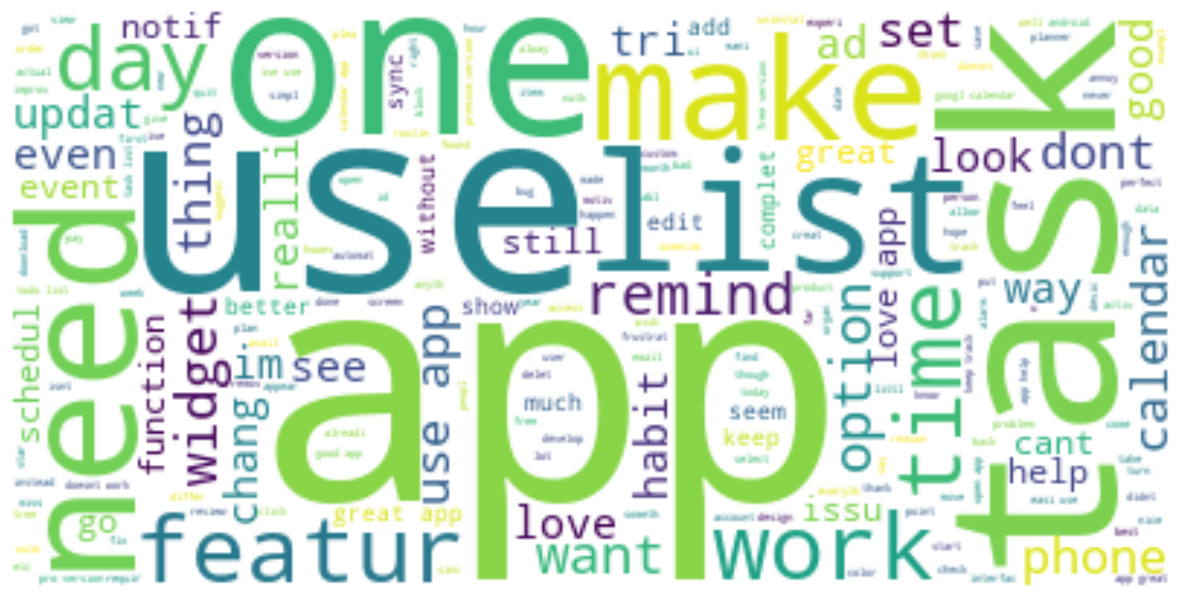

In [38]:
text = " ".join(i for i in data.content)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [39]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data["content"]]
data["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data["content"]]
data["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data["content"]]
data = data[["content", "Positive", "Negative", "Neutral"]]
print(data.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Ajayc\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                             content  Positive  Negative  \
0  recur task everi day need todolist remind buzz...     0.055     0.250   
1  instead shop around download anydo wide use se...     0.060     0.052   
2  everi blue app ask updat acct email everyth ta...     0.042     0.145   
3  terribl updat app use perfect plan certain tas...     0.230     0.066   
4  app deceiv terribl realli nice design featur l...     0.176     0.174   

   Neutral  
0    0.695  
1    0.887  
2    0.813  
3    0.704  
4    0.650  


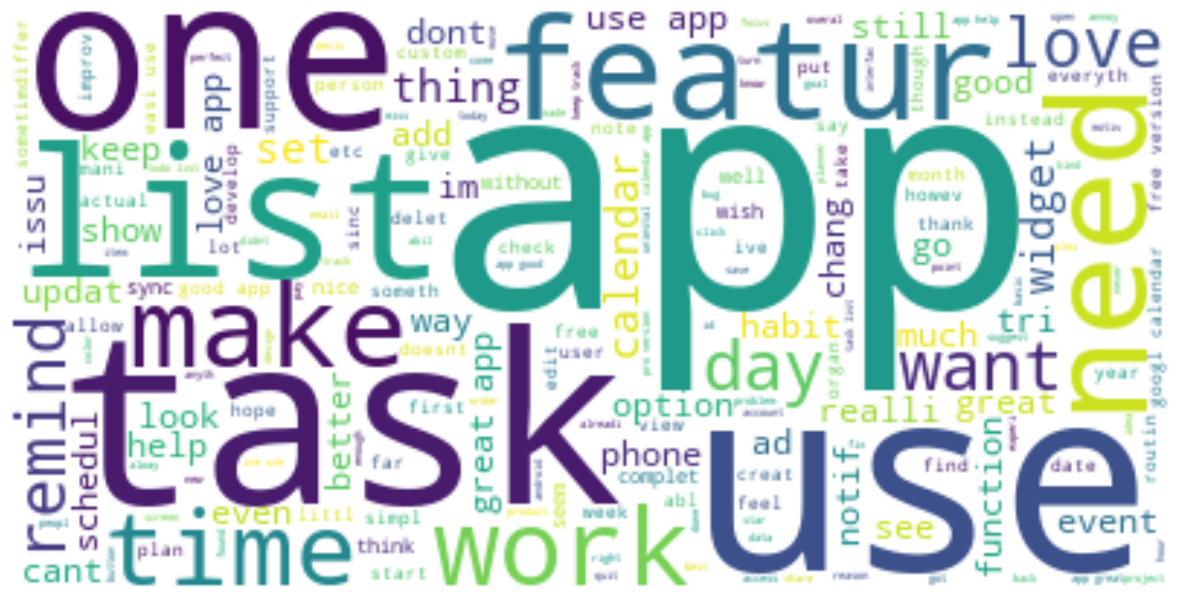

In [40]:
positive =' '.join([i for i in data['content'][data['Positive'] > data["Negative"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(positive)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

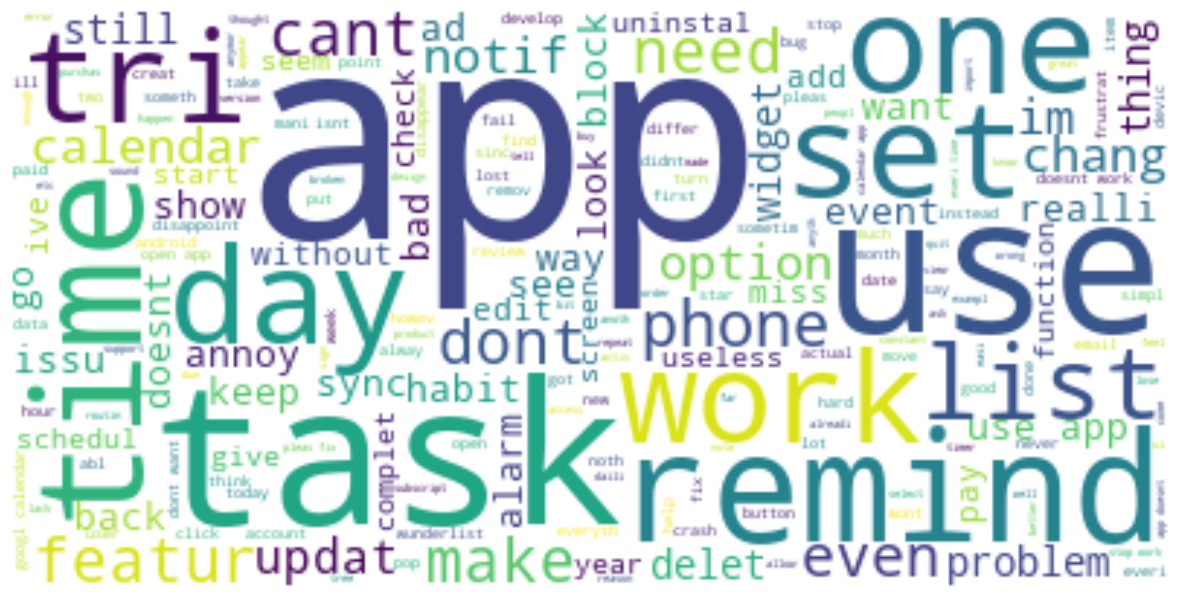

In [41]:
negative =' '.join([i for i in data['content'][data['Negative'] > data["Positive"]]])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(negative)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [42]:
data

,content,Positive,Negative,Neutral
0,recur task everi day need todolist remind buzz...,0.055,0.250,0.695
1,instead shop around download anydo wide use se...,0.060,0.052,0.887
2,everi blue app ask updat acct email everyth ta...,0.042,0.145,0.813
3,terribl updat app use perfect plan certain tas...,0.230,0.066,0.704
4,app deceiv terribl realli nice design featur l...,0.176,0.174,0.650
...,...,...,...,...
16782,excel app,0.750,0.000,0.250
16783,love easi use make life organ love way put pho...,0.492,0.000,0.508
16784,love could make plan check app almost everyday...,0.545,0.000,0.455
16785,exact need,0.000,0.000,1.000


In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Splitting the dataset into 80% training and 20% testing
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

print("\nTraining set shape:", train_data.shape)
print("Testing set shape:", test_data.shape)

# Display the first few rows of the training set
print("\nTraining set:")
print(train_data.head(5))

# Display the first few rows of the testing set
print("\nTesting set:")
print(test_data.head(5))


Training set shape: (13429, 4)
Testing set shape: (3358, 4)

Training set:
                                                 content  Positive  Negative  \
16372        miss hour block made easi scedual work hour     0.000     0.429   
483    im new use anydo im still realli unfamiliar ap...     0.252     0.000   
971    would love featur exampl could draw add stuff ...     0.350     0.145   
14426  revis initi gave  drop twice discov everyth sy...     0.048     0.127   
5751                                                good     1.000     0.000   

       Neutral  
16372    0.571  
483      0.748  
971      0.505  
14426    0.825  
5751     0.000  

Testing set:
                                                 content  Positive  Negative  \
10156        simplic unmatch 🙌 let focus task rather app     0.000     0.000   
15209  love program definit improv googl calendar eas...     0.292     0.000   
5267               decent app help focus studi cute anim     0.533     0.000   
11723  

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.metrics import accuracy_score, classification_report

# Tokenizing and padding the text data
max_words = 1000
max_len = 150

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(train_data['content'])

X_train = tokenizer.texts_to_sequences(train_data['content'])
X_test = tokenizer.texts_to_sequences(test_data['content'])

X_train = pad_sequences(X_train, maxlen=max_len, padding='post')
X_test = pad_sequences(X_test, maxlen=max_len, padding='post')

# Set the thresholds for sentiment labels
positive_threshold = 0.6
negative_threshold = 0.4

# Convert sentiment scores to categorical labels
train_data['Sentiment'] = train_data['Positive'].apply(lambda x: 'Positive' if x > positive_threshold else ('Negative' if x < negative_threshold else 'Neutral'))
test_data['Sentiment'] = test_data['Positive'].apply(lambda x: 'Positive' if x > positive_threshold else ('Negative' if x < negative_threshold else 'Neutral'))

# Encoding the target labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['Sentiment'])
y_test = label_encoder.transform(test_data['Sentiment'])

# Creating the deep learning model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(LSTM(64))
model.add(Dense(3, activation='softmax'))  # Change the output dimension to match the number of classes (3: Positive, Negative, Neutral)

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print("\nTest Accuracy:", accuracy)

Epoch 1/20
336/336 [==============================] - 41s 113ms/step - loss: 0.5216 - accuracy: 0.8546 - val_loss: 0.5036 - val_accuracy: 0.8593
Epoch 2/20
336/336 [==============================] - 40s 120ms/step - loss: 0.5079 - accuracy: 0.8571 - val_loss: 0.5088 - val_accuracy: 0.8593
Epoch 3/20
336/336 [==============================] - 40s 118ms/step - loss: 0.5074 - accuracy: 0.8571 - val_loss: 0.5083 - val_accuracy: 0.8593
Epoch 4/20
336/336 [==============================] - 38s 113ms/step - loss: 0.5064 - accuracy: 0.8571 - val_loss: 0.5055 - val_accuracy: 0.8593
Epoch 5/20
336/336 [==============================] - 39s 117ms/step - loss: 0.5061 - accuracy: 0.8571 - val_loss: 0.5033 - val_accuracy: 0.8593
Epoch 6/20
336/336 [==============================] - 40s 120ms/step - loss: 0.5061 - accuracy: 0.8571 - val_loss: 0.5039 - val_accuracy: 0.8593
Epoch 7/20
336/336 [==============================] - 39s 116ms/step - loss: 0.5067 - accuracy: 0.8571 - val_loss: 0.5051 - val_ac

In [45]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 128)          128000    
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 3)                 195       
                                                                 
Total params: 177,603
Trainable params: 177,603
Non-trainable params: 0
_________________________________________________________________


In [46]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

#function
def train_test_rmse(x,y):
    x = Iris_data[x]
    y = Iris_data[y]
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2,random_state=123)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    print(accuracy_score(y_test, y_pred))  
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))
